In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

project_name = 'DataSet/Xenium'
cmap='viridis'


In [2]:
position = pd.read_csv(f'{project_name}/reordered_position_with_center.csv')
row_all = position['imagerow'].tolist()
col_all = position['imagecol'].tolist()

In [3]:
merge_position = position[position['is_center']==1]

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr, spearmanr
from scipy.stats import wasserstein_distance as WD
import seaborn as sns
import matplotlib.pyplot as plt

# data = pd.read_csv(f'{project_name}/reordered_count.csv').fillna(0)
# data_spatial_1 = pd.read_csv(f'{project_name}/bayesspace_count_2.csv', index_col=0)

log = False
# log = True
method_names = ['reordered_count_all', 'data_ours', 'data_ours_marker_noimage', 'data_ours_noimage_nomarker', 'data_ours_nomarker']
data_dic = {}
for key in method_names:
    if not log:
        data_dic[key] = pd.read_csv(f'{project_name}/{key}.csv').fillna(0)
    else:
        data_dic[key] = pd.read_csv(f'{project_name}/{key}_log_counts.csv').fillna(0)

data_control = pd.read_csv(f'{project_name}/count_merge.csv').fillna(0)
position = pd.read_csv(f'{project_name}/reordered_position_with_center.csv')

row = np.array(position['imagerow'].tolist())
col = np.array(position['imagecol'].tolist())

r_position = pd.read_csv(f'{project_name }/colData_merge.csv')

row_r = r_position['row'].tolist()
col_r = r_position['col'].tolist()


# Supp Fig 4b

In [5]:
image_features = np.load(f"{project_name}/support_feature.npy")

In [8]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
pca50 = PCA(n_components=50)
image_features_centered = image_features - np.mean(image_features, axis=0)
principal_50 = pca50.fit_transform(image_features_centered)

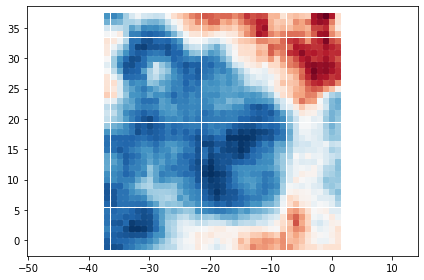

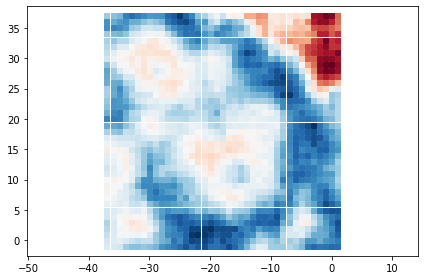

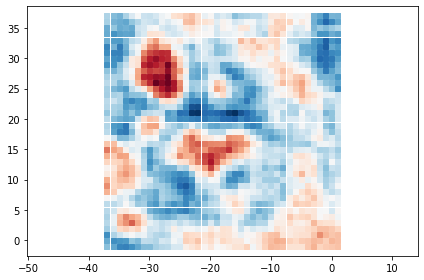

In [11]:
for i in range(3):
    c = principal_50[:, i]
    spot_x = position['col']
    spot_y = position['row']

    plt.axis("equal")
    img_0 = plt.scatter(-spot_x , spot_y, s=25,
                        marker='s',
                        c=c, cmap='RdBu_r')
    plt.tight_layout()
#     plt.savefig(f"{project_name}/PC_{i+1}.pdf")
    plt.show()

# Supp Fig 4c

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

filtered_position_df = pd.read_csv(f'{project_name}/reordered_position_with_center.csv')

G = nx.Graph()

for index, row in filtered_position_df.iterrows():
    G.add_node(index, pos=(row['imagerow'], row['imagecol']))

edges = np.load(f'{project_name}/sub_adj.npy')
for start, end, weight in edges:
    G.add_edge(start, end, weight=weight)

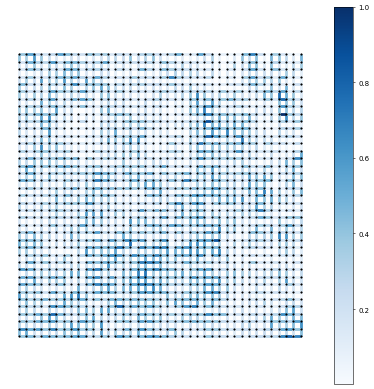

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx


filtered_position_df = pd.read_csv(f'{project_name}/reordered_position_with_center.csv')
for index, row in filtered_position_df.iterrows():
    G.add_node(index, pos=(-row['imagecol'], row['imagerow']))

    pos = nx.get_node_attributes(G, 'pos')
pos = nx.get_node_attributes(G, 'pos')

weights = [G[u][v]['weight'] for u, v in G.edges()]

weights = [np.log2(G[u][v]['weight']+1) for u, v in G.edges()]
fig, ax = plt.subplots(figsize=(10, 10), dpi=50)
nx.draw(G, pos, ax=ax, node_color='black', node_size=4,
        edge_color=weights, width=4, edge_cmap=plt.cm.Blues)
ax.set_aspect('equal')
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(weights), vmax=max(weights)))
sm._A = []  # pylint: disable=protected-access
plt.colorbar(sm)
# plt.savefig(f'{project_name}/image_graph.pdf')
plt.show()

# Supp Fig 4d

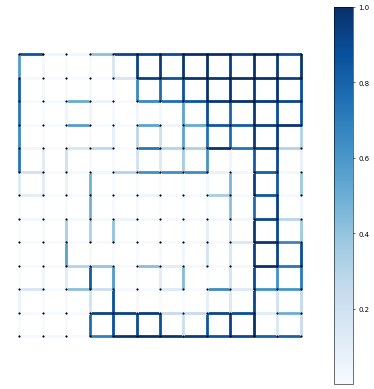

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx


filtered_position_df = pd.read_csv(f'{project_name}/colData_merge.csv')
edges = np.load(f'{project_name}/adj.npy')
G = nx.Graph() 

for index, row in filtered_position_df.iterrows():
    G.add_node(index, pos=(-row['x'], row['y']))

for start, end, weight in edges:
    G.add_edge(start, end, weight=weight)

pos = nx.get_node_attributes(G, 'pos')
weights = [G[u][v]['weight'] for u, v in G.edges()]
fig, ax = plt.subplots(figsize=(10, 10), dpi=50)
nx.draw(G, pos, ax=ax, node_color='black', node_size=4,
        edge_color=weights, width=4, edge_cmap=plt.cm.Blues)

ax.set_aspect('equal')

sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(weights), vmax=max(weights)))
sm._A = []  # pylint: disable=protected-access
plt.colorbar(sm)
# plt.savefig(f'{project_name}/high_graph.pdf')
plt.show()

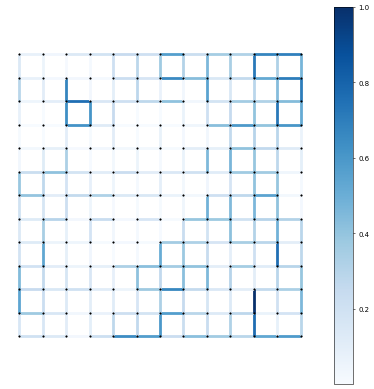

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx


filtered_position_df = pd.read_csv(f'{project_name}/colData_merge.csv')
edges = np.load(f'{project_name}/poor/adj.npy')
# 创建一个空的图
G = nx.Graph() 

# 添加节点
for index, row in filtered_position_df.iterrows():
    G.add_node(index, pos=(-row['x'], row['y']))

# for start, end, weight in edges:
#     if weight > 0.5:
#         G.add_edge(start, end, weight=weight)
for start, end, weight in edges:
    G.add_edge(start, end, weight=weight)

pos = nx.get_node_attributes(G, 'pos')
weights = [G[u][v]['weight'] for u, v in G.edges()]
fig, ax = plt.subplots(figsize=(10, 10), dpi=50)
nx.draw(G, pos, ax=ax, node_color='black', node_size=4,
        edge_color=weights, width=4, edge_cmap=plt.cm.Blues)

ax.set_aspect('equal')

sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(weights), vmax=max(weights)))
sm._A = []  # pylint: disable=protected-access
plt.colorbar(sm)
# plt.savefig(f'{project_name}/low_graph.pdf')
plt.show()

# Supp Fig 4e

In [27]:
import matplotlib.pyplot as plt
import matplotlib
cmp = 'viridis'

In [28]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

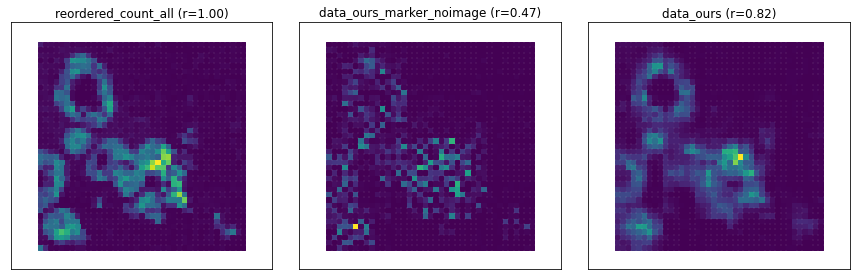

In [34]:
g_list = ['FASN', 'FOXA1', 'CEACAM6', 'GATA3', 'MZB1', 'AGR3', 'SERPINA3', 'TACSTD2', 'ABCC11', 'MKI67']
order = ['data_ours_marker_noimage', 'data_ours']
for g in ['FASN']:
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    for i, key in enumerate(['reordered_count_all']+order, start=0):
        c = data_dic[key][g]
        exp_gt = data_dic['reordered_count_all'][g]
        spot_x = -position['col']
        spot_y = position['row']

        img = axes[i].scatter(spot_x, spot_y, s=20, marker='s', c=c, cmap=cmp)
        pearson_, _ = pearsonr(exp_gt, c)
        axes[i].set_title(f'{key} (r={pearson_:.2f})')
        axes[i].axis("equal")
        axes[i].set_xticks([])
        axes[i].set_yticks([])
#     plt.savefig(f'{project_name }/{g}.pdf')
    plt.tight_layout()
    plt.show()

LAG3
LAG3
LAG3


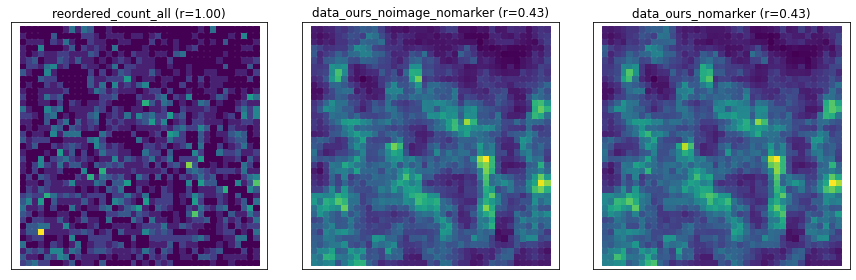

In [36]:
g_list = data_dic['data_ours_nomarker'].keys().tolist()[1:]
order = ['data_ours_noimage_nomarker', 'data_ours_nomarker']
for g in ['LAG3']:
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    for i, key in enumerate(['reordered_count_all']+order, start=0):
        print(g)
        c = data_dic[key][g]
        exp_gt = data_dic['reordered_count_all'][g]
        spot_x = -position['col']
        spot_y = position['row']

        img = axes[i].scatter(spot_x, spot_y, s=30, marker='s', c=c, cmap=cmp)
        pearson_, _ = pearsonr(exp_gt, c)
        axes[i].set_title(f'{key} (r={pearson_:.2f})')
        axes[i].axis("equal")
        axes[i].set_xticks([])
        axes[i].set_yticks([])
#     plt.savefig(f'{project_name }/{g}.pdf')
    plt.tight_layout()
    plt.show()

# Supp Fig 2f

In [37]:
def norm(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range
 
 
def standardization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma

pearson_dic = {}
mse_dic = {}
norm_mse_dic = {}

for key in method_names[1:]:
    pearson_dic[key] = []
    mse_dic[key] = []
    norm_mse_dic[key] = []

# ['reordered_count_all', 'data_ours', 'data_ours_marker_noimage', 'data_ours_noimage_nomarker', 'data_ours_nomarker']
top_gene = data_dic['data_ours'].keys().tolist()[1:]
for i in range(len(top_gene)):
    gene = top_gene[i]
    exp_gt = data_dic['reordered_count_all'][gene]
    for key in ['data_ours', 'data_ours_marker_noimage']:
        exp_ = data_dic[key][gene]
        # pearson
        pearson_, _ = pearsonr(exp_gt, exp_)
        # mse
        mse_ = mean_squared_error(exp_gt, exp_)
        norm_mse_ = mean_squared_error(norm(exp_gt), norm(exp_))
        pearson_dic[key].append(pearson_)
        mse_dic[key].append(mse_)
        norm_mse_dic[key].append(norm_mse_)

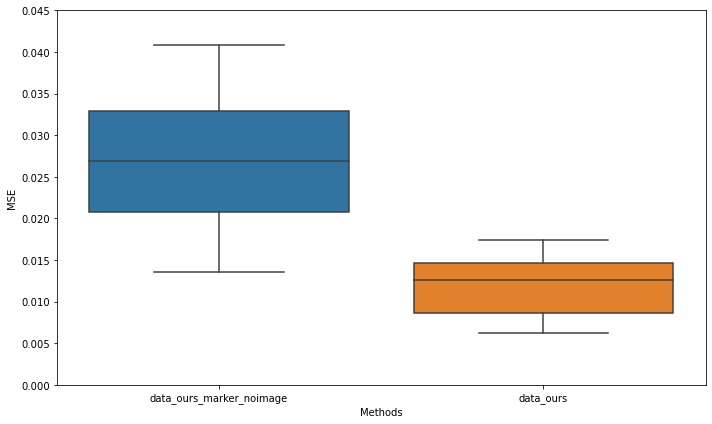

In [38]:
norm_mse_df = pd.DataFrame([(method, mse) for method, mses in norm_mse_dic.items() for mse in mses], 
                       columns=['Methods', 'MSE'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Methods', y='MSE', data=norm_mse_df, order=['data_ours_marker_noimage', 'data_ours'])
plt.ylim(0, 0.045)
plt.tight_layout()
plt.savefig(f'{project_name}/marker_mse.pdf', pad_inches=0)
plt.show()

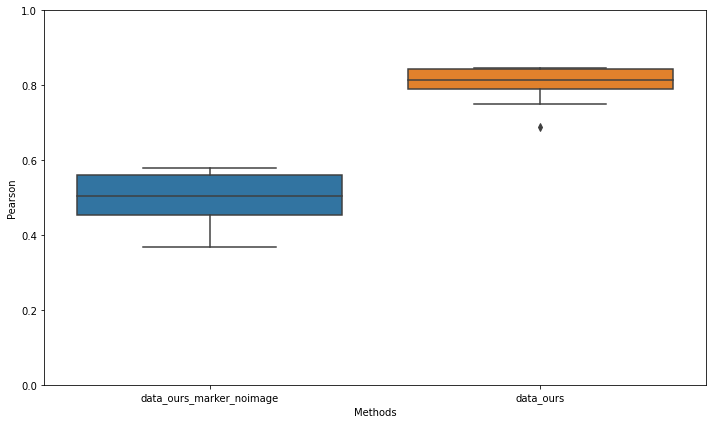

In [39]:
pearson_df = pd.DataFrame([(method, pearson) for method, pearsons in pearson_dic.items() for pearson in pearsons], 
                       columns=['Methods', 'Pearson'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Methods', y='Pearson', data=pearson_df, order=['data_ours_marker_noimage', 'data_ours'])
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig(f'{project_name}/marker_person.pdf', pad_inches=0)
plt.show()

In [40]:
import pandas as pd
from scipy.stats import ranksums

group1 = pearson_df[pearson_df['Methods'] == 'data_ours']['Pearson']
group2 = pearson_df[pearson_df['Methods'] == 'data_ours_marker_noimage']['Pearson']

stat, p_value = ranksums(group1, group2)

print('statics:', stat)
print('P value:', p_value)


statics: 3.779644730092272
P value: 0.00015705228423075119


In [41]:
pearson_dic = {}
mse_dic = {}
norm_mse_dic = {}

for key in method_names[1:]:
    pearson_dic[key] = []
    mse_dic[key] = []
    norm_mse_dic[key] = []

# ['reordered_count_all', 'data_ours', 'data_ours_marker_noimage', 'data_ours_noimage_nomarker', 'data_ours_nomarker']
top_gene = data_dic['data_ours_nomarker'].keys().tolist()[1:]
for i in range(len(top_gene)):
    gene = top_gene[i]
    exp_gt = data_dic['reordered_count_all'][gene]
    for key in ['data_ours_noimage_nomarker', 'data_ours_nomarker']:
        exp_ = data_dic[key][gene]
        # pearson
        pearson_, _ = pearsonr(exp_gt, exp_)
        # mse
        mse_ = mean_squared_error(exp_gt, exp_)
        norm_mse_ = mean_squared_error(norm(exp_gt), norm(exp_))
        pearson_dic[key].append(pearson_)
        mse_dic[key].append(mse_)
        norm_mse_dic[key].append(norm_mse_)

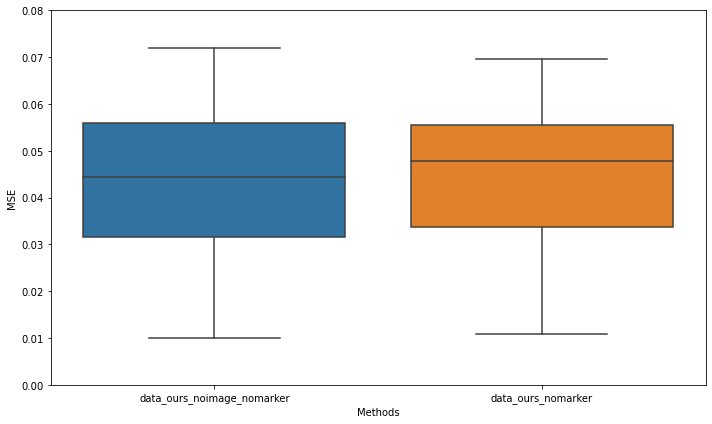

In [42]:
norm_mse_nomarker_df = pd.DataFrame([(method, mse) for method, mses in norm_mse_dic.items() for mse in mses], 
                       columns=['Methods', 'MSE'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Methods', y='MSE', data=norm_mse_nomarker_df, order=['data_ours_noimage_nomarker', 'data_ours_nomarker'])
plt.ylim(0, 0.08)
plt.tight_layout()
plt.savefig(f'{project_name}/nomarker_mse.pdf', pad_inches=0)
plt.show()

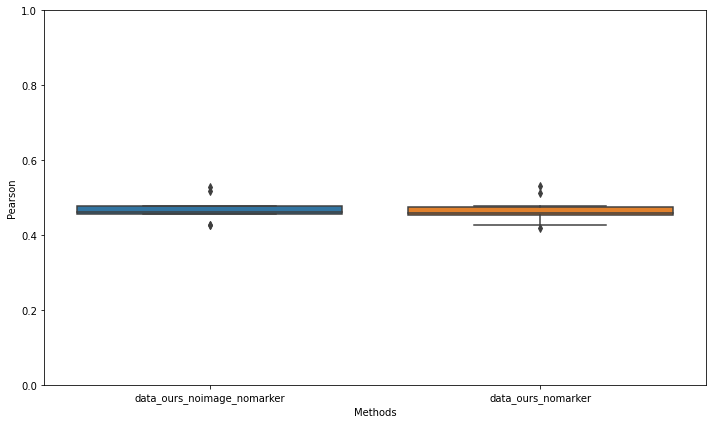

In [43]:
pearson_nomarker_df = pd.DataFrame([(method, pearson) for method, pearsons in pearson_dic.items() for pearson in pearsons], 
                       columns=['Methods', 'Pearson'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Methods', y='Pearson', data=pearson_nomarker_df, order=['data_ours_noimage_nomarker', 'data_ours_nomarker'])
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig(f'{project_name}/nomarker_person.pdf', pad_inches=0)
plt.show()

In [44]:
import pandas as pd
from scipy.stats import ranksums

group1 = pearson_nomarker_df[pearson_nomarker_df['Methods'] == 'data_ours_noimage_nomarker']['Pearson']
group2 = pearson_nomarker_df[pearson_nomarker_df['Methods'] == 'data_ours_nomarker']['Pearson']

stat, p_value = ranksums(group1, group2)

print('statics:', stat)
print('P value:', p_value)

statics: 0.6047431568147635
P value: 0.5453496680111236
